# <center> Data Visualisation

## 1. Introduction

**DID YOU KNOW**

- The human brain takes only 13 milliseconds to process an image
- Visuals are processed 60,000 times faster than text inside the human brain.

 Understanding data requires the use of data visualizations

**Importance of data visualisation:** 
    
Data visualization is an essential part of exploratory data analysis. It is more effective than plain numbers at providing an overview or summary of data. Data visualizations help us understand the underlying structure within a dataset or explore the relationships among variables.

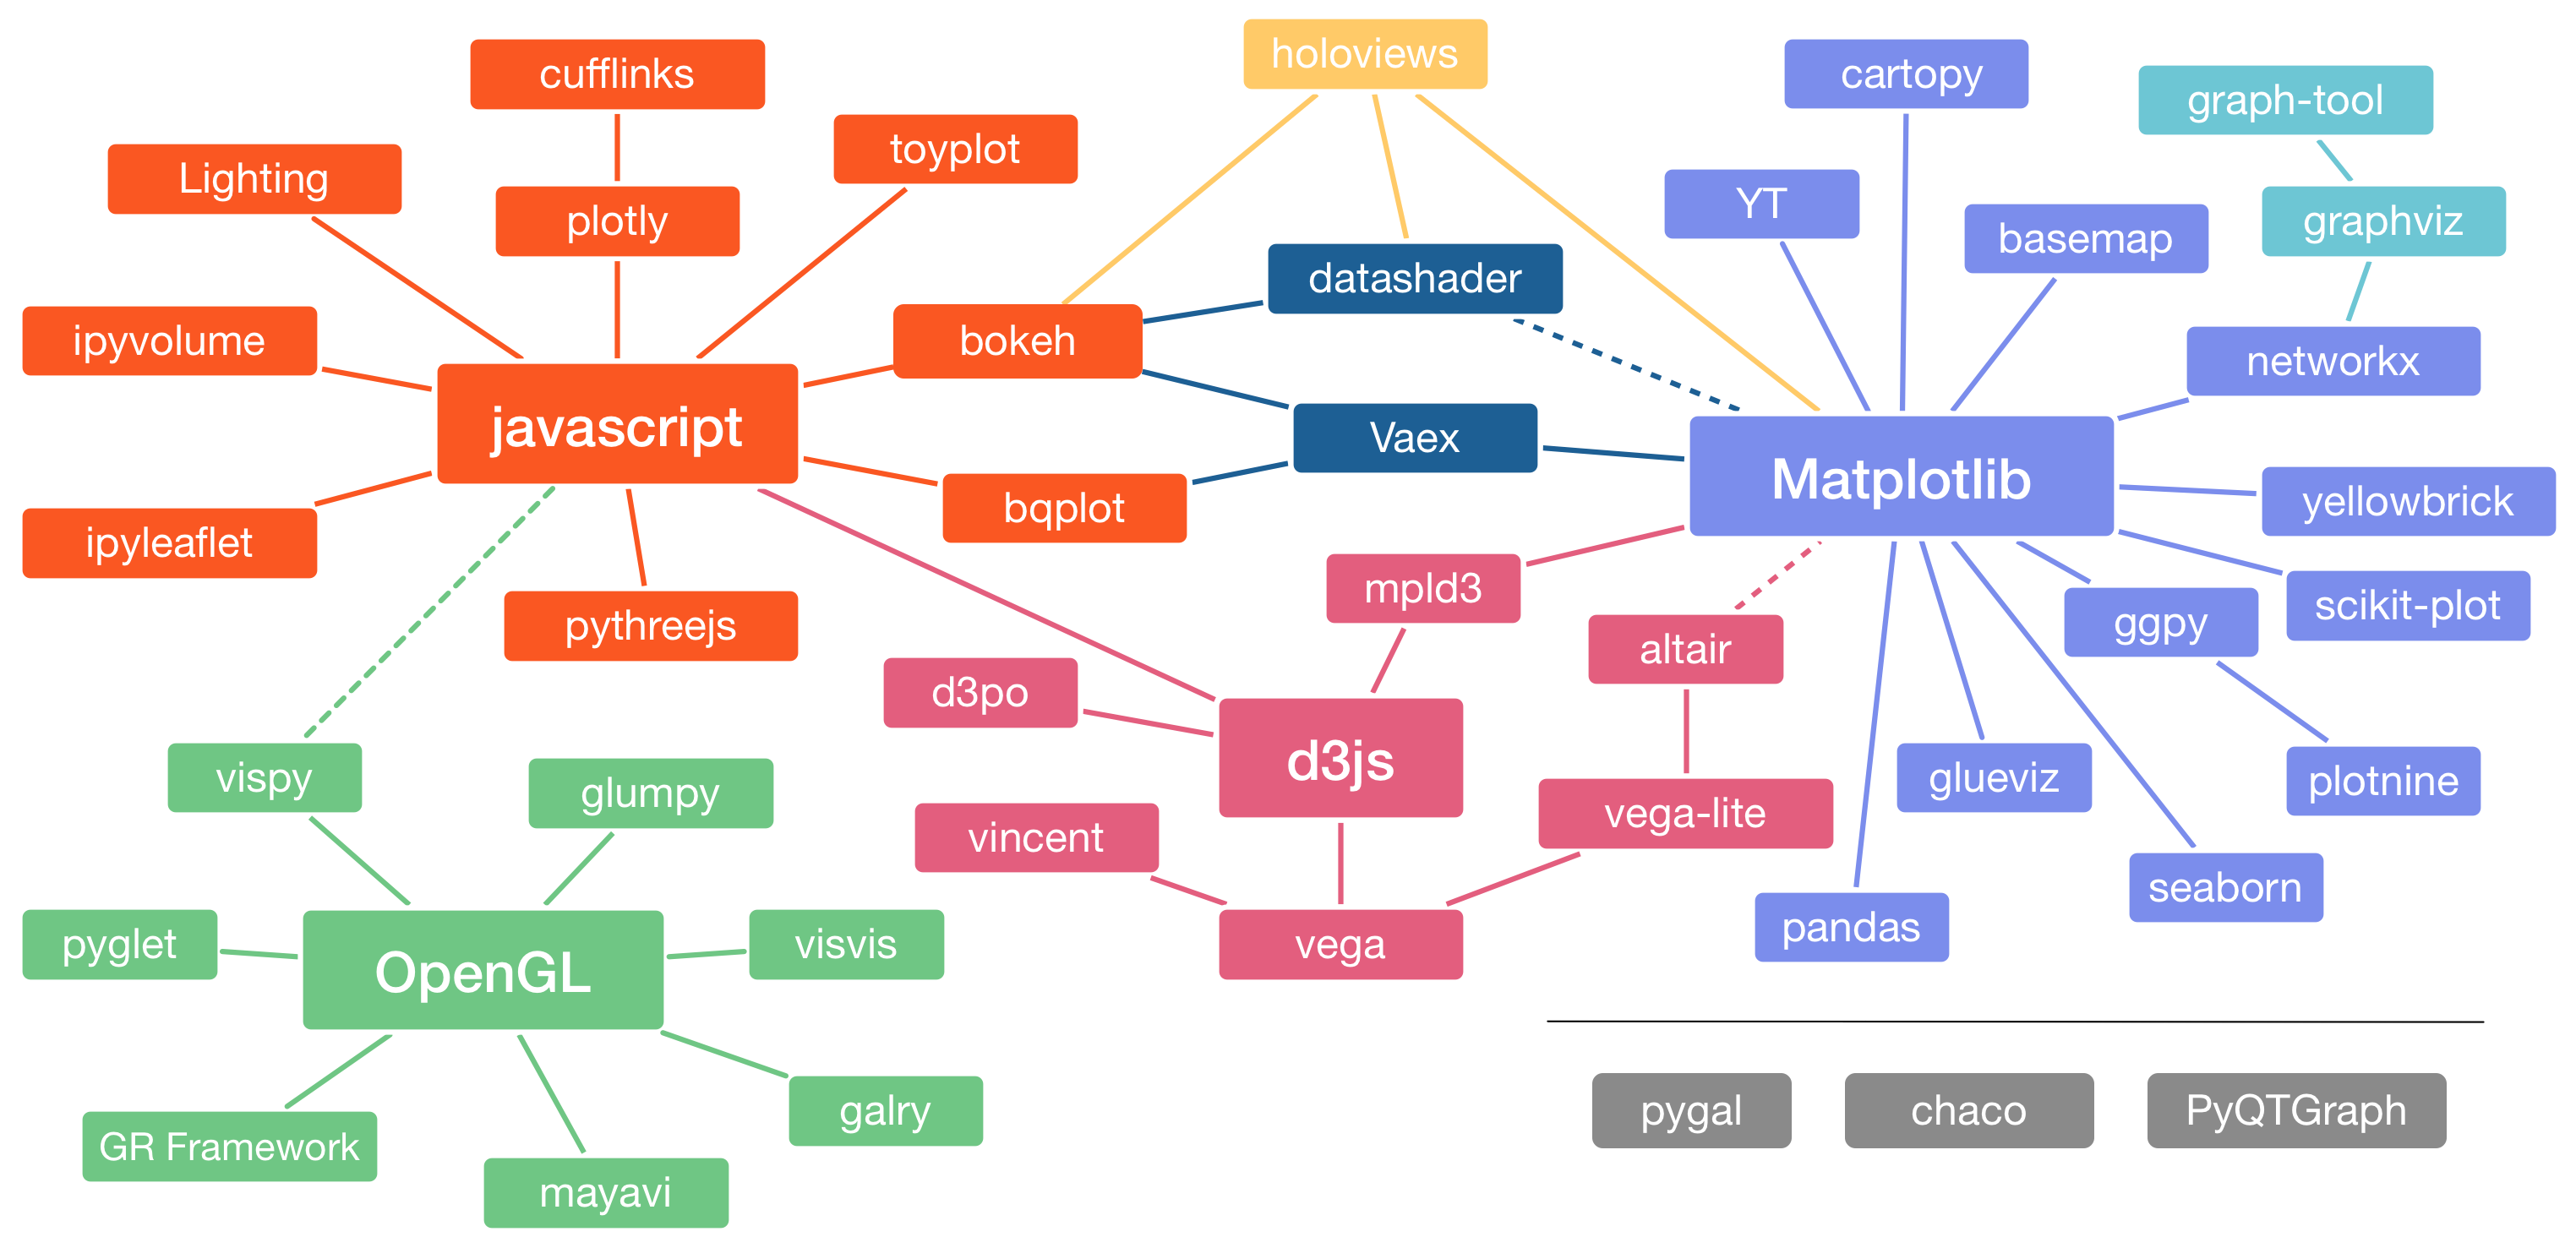

### Which plot to make?

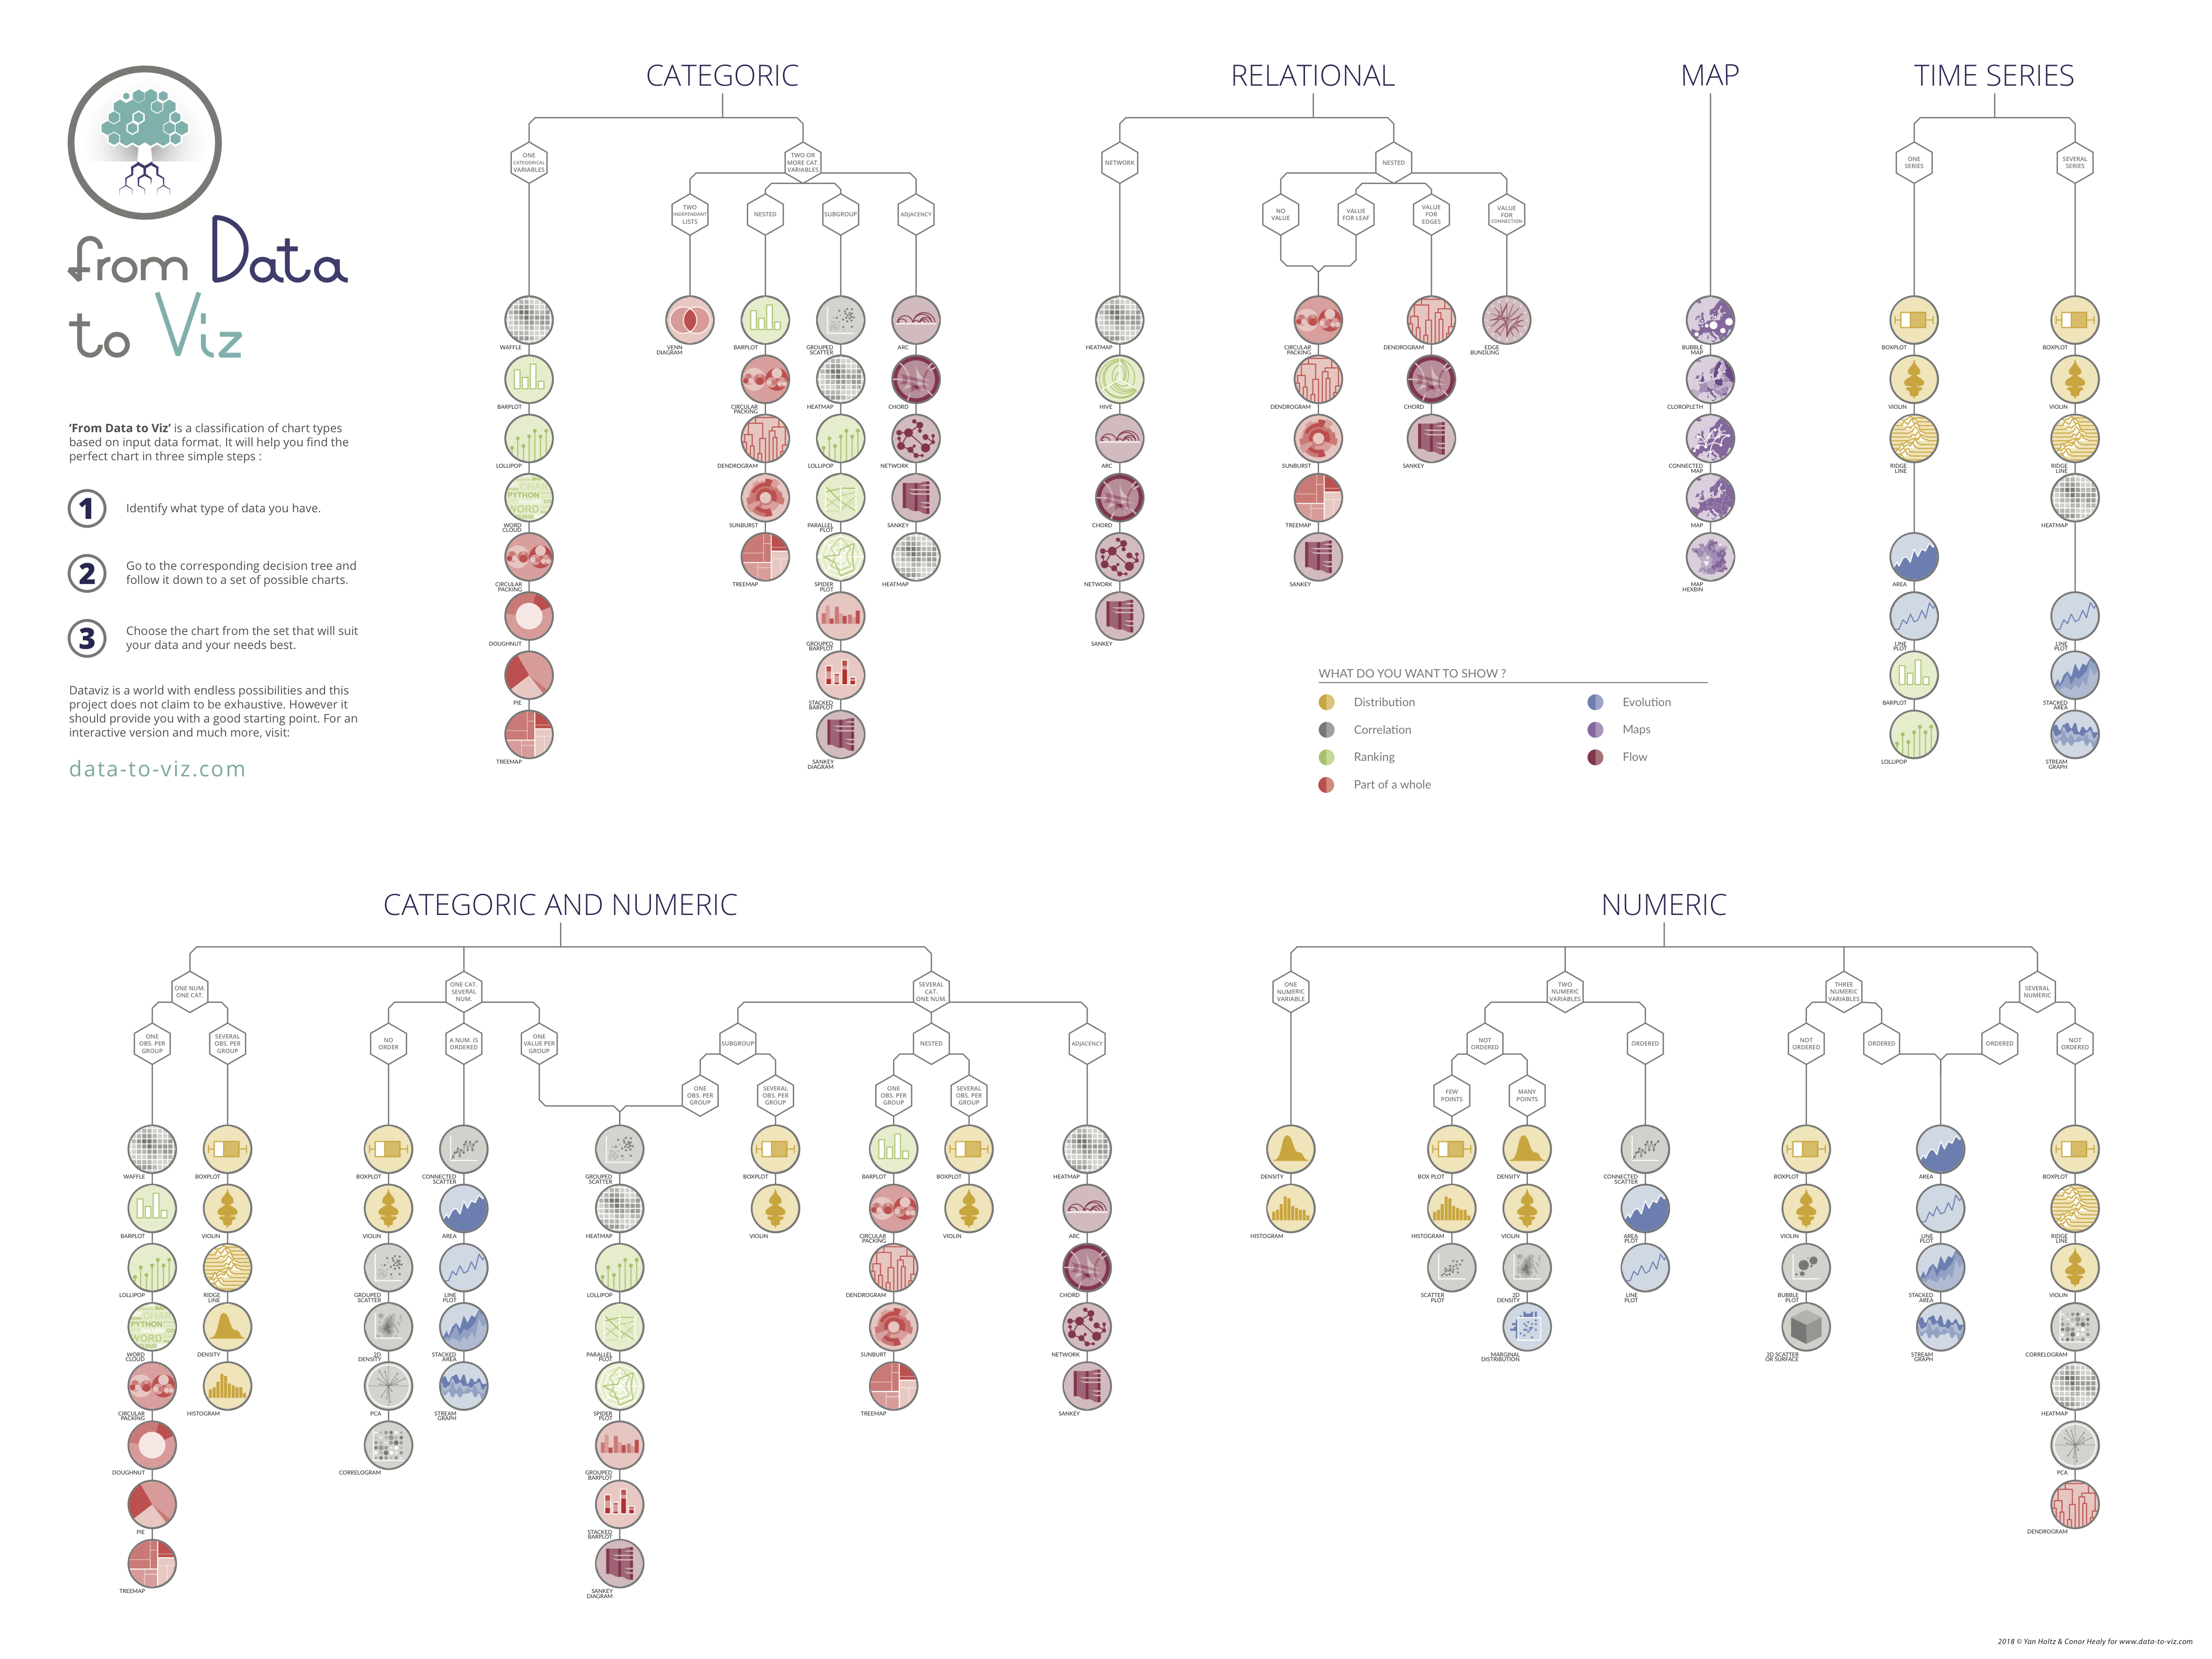

## 2. Imperative vs. Declarative programming 

**Imperative**
- Specify How something should be done
- Specification & Execution intertwined.
- “Put a red circle here and a blue circle here”

**Declarative**
- Specify What should be done.
- Separates Specification from Execution
- “Map x to a position, and y to a color”

*"Declarative visualization lets you think about data and relationships, rather than incidental details", Jake Vanderplas*

## 3. What we'll see

- Static plots
    - Matplotlib
    - Pandas
    - Seaborn
    - Plotnine
    - Geopandas
    - Networkx
- Interactive plots
    - Plotly
    - Plotly Express
    - Bokeh
    - Altair
- Specific plots
    - Text Word cloud
    - Text scatterplot
    - MissingNo
- Cases
    - Airport Traffic
    - Fifa
    

## 4. Import datasets and explore

In [4]:
# libraries
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import os
import numpy as np
import datetime

In [8]:
os.getcwd()

'C:\\Users\\melanie.vercaempt\\Documents\\Code\\train-keyrus-academy-python\\data-viz\\notebooks'

In [9]:
os.chdir(r'C:\\Users\\melanie.vercaempt\\Documents\\Code\\train-keyrus-academy-python\\data-viz')

In [10]:
# data for examples
iris = pd.read_csv('data/iris.csv')
iris.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
# data - mostly numerical values
cars = pd.read_csv('data/auto-mpg.csv')
cars['horsepower'] = pd.to_numeric(cars['horsepower'], errors='coerce')
cars = cars.dropna(axis='rows')
countries = pd.DataFrame({'origin':[1,2,3],
                          'country': ['USA', 'Europe', 'Japan']})
cars = cars.merge(countries, on='origin')
cars = cars.drop('origin', axis='columns')
cars.head()
# cars.info()
# cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,country
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,USA
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,USA
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,USA
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,USA
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,USA


In [12]:
# data - mostly categories
titanic = pd.read_csv('data/titanic.csv')
del titanic['Unnamed: 0']
titanic.head()
# titanic.info()
# titanic.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
# data
tips = pd.read_csv('data/tips.csv')
tips = tips.drop(['Unnamed: 0'], axis='columns')
tips.head()
# tips.info()
# tips.describe()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
houses = pd.read_csv('data/melb_data.csv')
houses.Date = houses['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y'))
houses = houses.drop(['Rooms','Type','Method','SellerG','Distance','Bedroom2','Bathroom', 'Car', 'BuildingArea','CouncilArea','Lattitude','Longtitude','Propertycount'], axis='columns')
houses['Month_Year'] = houses['Date'].dt.to_period('M')
houses.head()

,Suburb,Address,Price,Date,Postcode,Landsize,YearBuilt,Regionname,Month_Year
0,Abbotsford,85 Turner St,1480000.0,2016-12-03,3067.0,202.0,NaN,Northern Metropolitan,2016-12
1,Abbotsford,25 Bloomburg St,1035000.0,2016-02-04,3067.0,156.0,1900.0,Northern Metropolitan,2016-02
2,Abbotsford,5 Charles St,1465000.0,2017-03-04,3067.0,134.0,1900.0,Northern Metropolitan,2017-03
3,Abbotsford,40 Federation La,850000.0,2017-03-04,3067.0,94.0,NaN,Northern Metropolitan,2017-03
4,Abbotsford,55a Park St,1600000.0,2016-06-04,3067.0,120.0,2014.0,Northern Metropolitan,2016-06


In [15]:
weather = pd.read_csv('data/weatherHistory.csv')
weather = weather.drop(['Apparent Temperature (C)','Humidity','Wind Bearing (degrees)', 'Visibility (km)','Loud Cover'], axis = 'columns')
weather['Formatted Date'] = weather['Formatted Date'].apply(lambda x: datetime.datetime.strptime(str(x)[:19], '%Y-%m-%d %H:%M:%S'))
weather.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,14.1197,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,14.2646,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,3.9284,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,14.1036,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,11.0446,1016.51,Partly cloudy throughout the day.


In [16]:
# Life expectancy 
life = pd.read_csv('data/LifeExpectancyEU.csv')
life = life.drop(['Unnamed: 0'], axis='columns')


life.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Austria,2015,Developed,81.5,65.0,0,NaN,0.000000,93.0,309,...,93.0,NaN,93.0,0.1,43665.94700,8633169.0,1.9,2.1,0.892,15.9
1,Austria,2014,Developed,81.4,66.0,0,12.32,8350.193523,98.0,117,...,98.0,11.21,98.0,0.1,51322.63997,8541575.0,1.8,2.0,0.892,15.9
2,Austria,2013,Developed,81.1,68.0,0,11.82,90.585012,95.0,0,...,95.0,11.14,95.0,0.1,554.71532,8479375.0,1.8,2.0,0.887,15.7
3,Austria,2012,Developed,88.0,7.0,0,12.26,7878.372355,92.0,36,...,92.0,11.17,92.0,0.1,48333.57273,8429991.0,1.8,2.0,0.884,15.7
4,Austria,2011,Developed,88.0,73.0,0,12.04,8272.306757,89.0,68,...,89.0,1.94,89.0,0.1,51126.74139,8391643.0,1.7,2.0,0.880,15.7


In [18]:
#Geolocations 
geo_file = r'data\sh_statbel_statistical_sectors_20210101.shp'

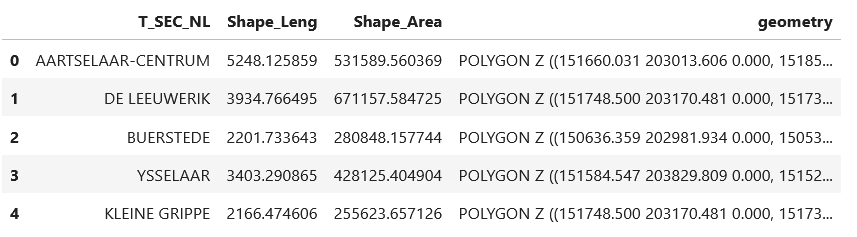